# Analyzing and plotting data 

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [19]:
from demand_forecasting.read import read_data

# Reading voiholm rode data 
rides_raw_df = read_data('../input/voiholm.csv')

# Reading weather data
weather_raw_df = read_data('../input/weather_data.csv')

INFO:root:Read dataframe from file path ../input/voiholm.csv
INFO:root:Read dataframe from file path ../input/weather_data.csv


In [20]:
from demand_forecasting.verify import verify_ride_df, verify_weather_df

# verifying the dataframes 
rides_df = verify_ride_df(rides_raw_df)
weather_df = verify_weather_df(weather_raw_df)

INFO:root:Validated Voiholm ride dataframe
INFO:root:Validated weather dataframe


In [21]:
from demand_forecasting.preprocess import preprocessing

df, unique_h3index_df = preprocessing(rides_df=rides_df, weather_df=weather_df)
df

INFO:root:Preprossed dataframe


,h3index_small,start_date,num_of_rides,date,temperature,max_temperature,min_temperature,precipitation,start_weekday
0,891f2506107ffff,2020-08-01,0.0,2020-08-01,17.6,19.3,15.6,0.69,Saturday
1,891f2506107ffff,2020-08-02,0.0,2020-08-02,16.7,19.1,14.8,0.00,Sunday
2,891f2506107ffff,2020-08-03,1.0,2020-08-03,16.8,19.6,14.3,0.00,Monday
3,891f2506107ffff,2020-08-04,2.0,2020-08-04,15.0,17.1,12.8,11.44,Tuesday
4,891f2506107ffff,2020-08-05,2.0,2020-08-05,21.5,26.5,17.0,0.50,Wednesday
...,...,...,...,...,...,...,...,...,...
9775,891f25a9ecbffff,2020-08-26,0.0,2020-08-26,16.7,20.8,13.5,0.00,Wednesday
9776,891f25a9ecbffff,2020-08-27,0.0,2020-08-27,13.9,18.5,9.1,0.60,Thursday
9777,891f25a9ecbffff,2020-08-28,0.0,2020-08-28,14.5,17.8,12.1,0.10,Friday
9778,891f25a9ecbffff,2020-08-29,1.0,2020-08-29,14.7,19.8,8.9,0.00,Saturday


In [22]:
# Aggregating number of rides per day 
rides_per_day_df = df.groupby(['start_date',
                                'start_weekday',
                                'temperature',
                                'precipitation']).agg({'num_of_rides':'sum'}).reset_index()

rides_per_day_df.head(5)

,start_date,start_weekday,temperature,precipitation,num_of_rides
0,2020-08-01,Saturday,17.6,0.69,8689.0
1,2020-08-02,Sunday,16.7,0.00,3574.0
2,2020-08-03,Monday,16.8,0.00,4169.0
3,2020-08-04,Tuesday,15.0,11.44,4912.0
4,2020-08-05,Wednesday,21.5,0.50,2668.0


In [44]:
rides_df

,ride_id,city_name,start_time,start_lon,start_lat,h3index_big,h3index_small,start_date
0,97341db7-f89f-45db-9dd1-bcc2620fc1db,voiholm,2020-08-05 04:27:40.425797,11.908587,57.687122,881f250613fffff,891f250612bffff,2020-08-05
1,646c160f-bbb7-4c78-b2ca-bdd8644a8400,voiholm,2020-08-05 07:47:29.060615,11.908669,57.687050,881f250613fffff,891f250612bffff,2020-08-05
2,6082a591-03ca-4a6d-a7f4-af9ea5a30366,voiholm,2020-08-05 07:42:37.610980,11.908693,57.687042,881f250613fffff,891f250612bffff,2020-08-05
3,eea5165f-c8e5-4e61-b604-c219226dbc1e,voiholm,2020-08-05 13:38:59.425146,11.912271,57.689289,881f250613fffff,891f2506123ffff,2020-08-05
4,ef26200a-6d0f-40cf-b1fb-91b2a5b6270c,voiholm,2020-08-05 03:29:27.859222,11.913318,57.690361,881f250613fffff,891f2506123ffff,2020-08-05
...,...,...,...,...,...,...,...,...
164361,818eb4eb-03b1-4836-80dd-eedf24245e8f,voiholm,2020-08-21 13:59:31.111663,12.000498,57.717979,881f25a9ebfffff,891f25a9ebbffff,2020-08-21
164362,e3c47612-6c61-4acc-a456-cb4292fa96f4,voiholm,2020-08-21 08:18:33.740151,12.000905,57.714794,881f25a9ebfffff,891f25a9eabffff,2020-08-21
164363,cc117fa0-458b-409a-a847-6b2675bbef0b,voiholm,2020-08-21 06:57:10.500826,12.005732,57.721436,881f25a9ebfffff,891f25a9eb7ffff,2020-08-21
164364,fc79fa02-c231-48d2-9caf-81e8ece06cdc,voiholm,2020-08-21 10:29:34.908873,12.005229,57.720001,881f25a9ebfffff,891f25a9eb7ffff,2020-08-21


In [46]:
# Aggregating number of rides per day and per area 
rides_per_day_and_area_df = rides_df.groupby(['h3index_small']).agg({'start_lon': 'mean',
                                                                     'start_lat': 'mean', 
                                                                    'ride_id':'nunique'}).reset_index()

rides_per_day_and_area_df.rename(columns={'ride_id':'num_of_rides'}, inplace=True)
rides_per_day_and_area_df

,h3index_small,start_lon,start_lat,num_of_rides
0,891f2506107ffff,11.907544,57.690682,41
1,891f2506123ffff,11.913554,57.689369,349
2,891f2506127ffff,11.918697,57.689381,199
3,891f250612bffff,11.911921,57.686695,74
4,891f250612fffff,11.916678,57.687183,365
...,...,...,...,...
321,891f25a9eafffff,12.005066,57.715892,540
322,891f25a9eb3ffff,12.002698,57.719611,127
323,891f25a9eb7ffff,12.005948,57.720376,437
324,891f25a9ebbffff,11.999505,57.716997,394


# Plotting

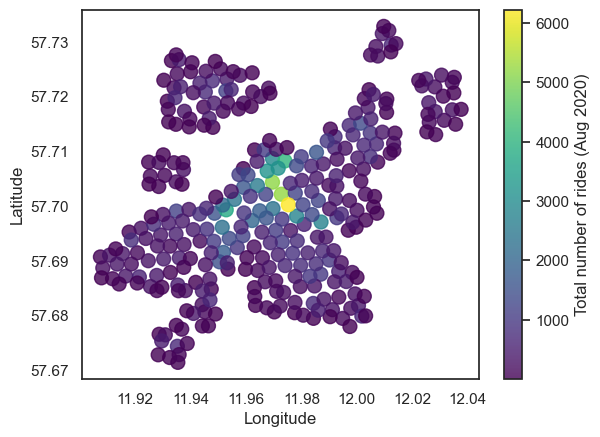

In [51]:
latitude = np.array(rides_per_day_and_area_df.start_lat)
longitude = np.array(rides_per_day_and_area_df.start_lon)
num_of_rides = np.array(rides_per_day_and_area_df.num_of_rides)

plt.scatter(longitude, latitude, c=num_of_rides, cmap='viridis', s=100, alpha=0.8)

# Adding colorbar for better interpretation of numbers
cbar = plt.colorbar()
cbar.set_label('Total number of rides (Aug 2020)')

# Adding labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.title('Number of rides based on latitude and longitude of start location')

plt.savefig('../notebooks/figures/num_of_rides_overview_per_h3index_small.png')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


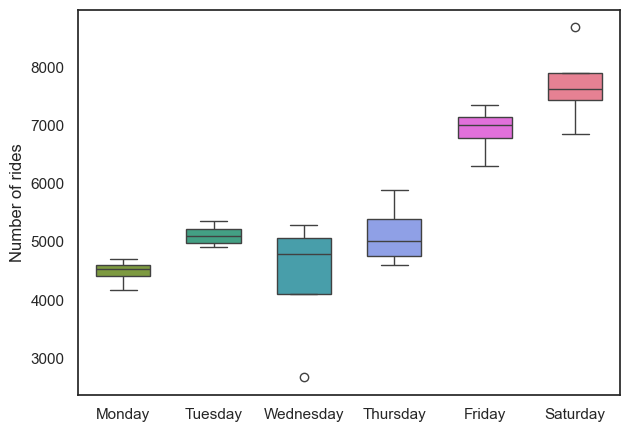

In [42]:
# Plotting boxplot for number of rides per weekday
plt.figure(figsize=[7,5])
sns.boxplot(x='start_weekday', y='num_of_rides', data=rides_per_day_df, hue='start_weekday', palette='husl', width=0.6,
             order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.ylabel('Number of rides')
plt.xlabel('')
plt.show()
#plt.savefig('../notebooks/figures/weekday_overview.png')

In [60]:
rides_per_day_df[['precipitation', 'temperature', 'num_of_rides']].corr()

,precipitation,temperature,num_of_rides
precipitation,1.000000,-0.260865,-0.081143
temperature,-0.260865,1.000000,0.016990
num_of_rides,-0.081143,0.016990,1.000000


In [66]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
corr_coef, p_value = pearsonr(rides_per_day_df['precipitation'], rides_per_day_df['num_of_rides'])
print(f"Pearson Correlation Coefficient: {corr_coef}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: -0.08114265391917885
P-value: 0.6699213759525456


In [67]:
# Calculate Pearson correlation coefficient and p-value
corr_coef, p_value = pearsonr(rides_per_day_df['temperature'], rides_per_day_df['num_of_rides'])
print(f"Pearson Correlation Coefficient: {corr_coef}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.016990032334278125
P-value: 0.9289942601055317


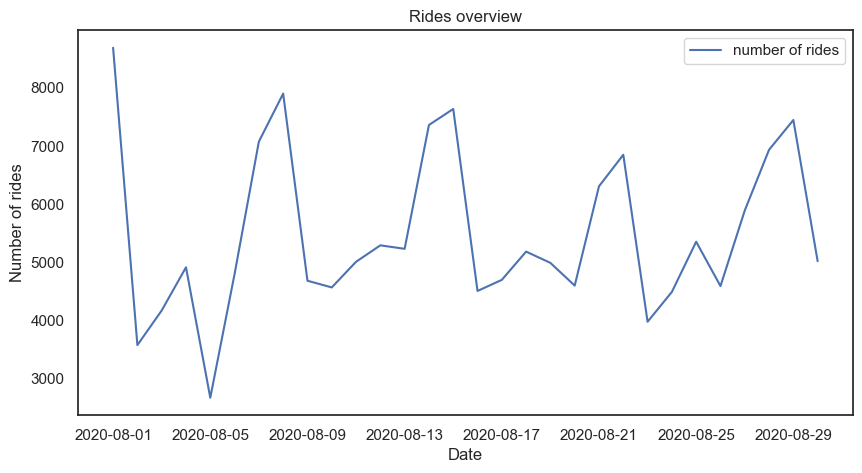

In [52]:
# Plotting aggregating rides 
plt.figure(figsize=(10,5))
plt.plot(rides_per_day_df.start_date, rides_per_day_df.num_of_rides, label='number of rides')

plt.title("Rides overview")
plt.xlabel("Date")
plt.ylabel("Number of rides")
plt.legend()
plt.show()

In [54]:
rides_per_day_df

,start_date,start_weekday,temperature,precipitation,num_of_rides,precipitation_group
0,2020-08-01,Saturday,17.6,0.69,8689.0,b: 0.5-3
1,2020-08-02,Sunday,16.7,0.00,3574.0,a: 0
2,2020-08-03,Monday,16.8,0.00,4169.0,a: 0
3,2020-08-04,Tuesday,15.0,11.44,4912.0,d: >3
4,2020-08-05,Wednesday,21.5,0.50,2668.0,b: 0.5-3
5,2020-08-06,Thursday,24.8,0.00,4796.0,a: 0
6,2020-08-07,Friday,23.9,0.00,7074.0,a: 0
7,2020-08-08,Saturday,22.9,0.00,7900.0,a: 0
8,2020-08-09,Sunday,21.7,0.00,4681.0,a: 0
9,2020-08-10,Monday,22.1,0.00,4566.0,a: 0


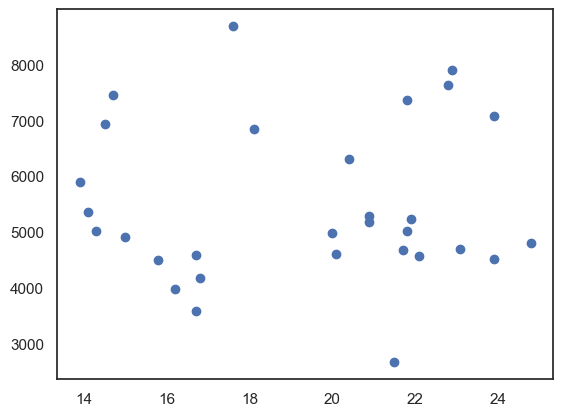

In [57]:
plt.scatter( rides_per_day_df.temperature, rides_per_day_df.num_of_rides)

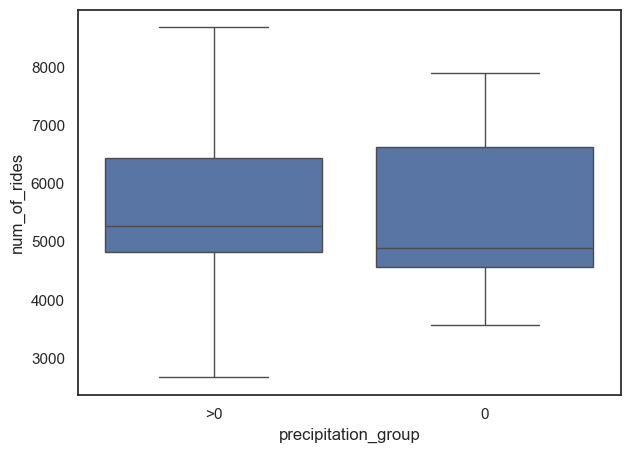

In [55]:
# Plotting boxplot for number of rides for different amount of precipitation
rides_per_day_df['precipitation_group'] = rides_per_day_df.precipitation.map(lambda x: '0' if x==0 else '>0') 
                                                                             
  #  'c: 0.1-0.5' if x < 0.5 else (
  #  'b: 0.5-3' if x < 3 else (
  #      'd: >3'
  #  ))))

plt.figure(figsize=[7,5])
sns.boxplot(x='precipitation_group', y='num_of_rides', data=rides_per_day_df)
plt.show()